# Analyse de données 

In [4]:
import json
import glob
import pandas as pd
import numpy as np
from scipy.stats import gmean
import matplotlib.pyplot as plt

# Dictionnaire pour stocker les données de tous les fichiers JSON
acheteurs = []
vendeurs = []

# Chemin vers le répertoire de données
path = '../data/*.json'

# Parcourir tous les fichiers JSON dans le dossier
for file_name in glob.glob(path):
    with open(file_name, 'r') as f:
        # Charger les données du fichier JSON
        json_data = json.load(f)
        donnee_demographique = json_data['donnee_demographique']
        if ~donnee_demographique['statut'].find('vendeur'):
            vendeur = {};
            vendeur.update(donnee_demographique)
            vendeur.update(json_data['vendeur'])
            vendeurs.append(vendeur)
        if ~donnee_demographique['statut'].find('acheteur'):
            acheteur = {};
            acheteur.update(donnee_demographique)
            acheteur.update(json_data['acheteur'])
            acheteurs.append(acheteur)

In [13]:
def recupere_element_plus_utilise(element, cle, titre="Répartition des éléments"):
    element = element.explode(cle)
    value_counts = element.value_counts()
    total = value_counts.sum()
    
    value_counts_df = pd.DataFrame(value_counts)
    value_counts_df.columns = ['Total']
    value_counts_df['Proportion (%)'] = ((value_counts / total) * 100).round(2)
    
    # Trier le DataFrame par 'Proportion (%)' du plus grand au plus petit
    value_counts_df = value_counts_df.sort_values('Proportion (%)', ascending=False)
    
    # Ajouter une colonne de libellés
    value_counts_df['Libellé'] = [chr(65 + i) for i in range(len(value_counts_df))]
    
    # tableau
    display(value_counts_df)
    # Création du graphique
    value_counts_df.set_index('Libellé')['Total'].plot(kind='bar')
    plt.title(titre)
    plt.xlabel('Élément')
    plt.ylabel('Total')
    plt.show()

    
def calculer_mesures(df):
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Calculer la moyenne arithmétique
    moyenne_arithmetique = round(df.mean())
    # Calculer la variance
    variance = round(df.var(), 2)
    # Calculer l'écart-type
    ecart_type = round(df.std(), 2)
    
    # Créer un dataframe pour les résultats
    resultats = pd.DataFrame({
        'Moyenne Arithmétique': moyenne_arithmetique,
        'Variance': variance,
        'Écart-Type': ecart_type
    },['valeurs'])
    display(resultats)

display(pd.DataFrame(vendeurs))
display(pd.DataFrame(acheteurs))
display(pd.DataFrame({
    'Vendeurs': [len(vendeurs)],
    'Acheteurs': [len(acheteurs)],
}, ['Nombre']))



,date_de_naissance,genre,commune,niveau_education,statut,numbers,duree_activite,type_produits_services,reseaux_sociaux_vendre,nombre_articles_achetes_vente,nombre_articles_vendus,nombre_abonnes_pages,nombre_vues_moyen_publication,paiement,systeme_livraison,defis_commerce_electronique,coords
0,"Tue, 26 Dec 1972 03:13:39 GMT",homme,ngaliema,diplome_universitaire,vendeur_et_acheteur,[0800196614],moins_de_3_mois,"[alimentation_boissons, instruments_musique, e...","[youtube, twitter, tiktok]",850,572,"[{'youtube': '3209'}, {'twitter': '4976'}, {'t...","[{'youtube': '1219'}, {'twitter': '3861'}, {'t...",[airtel_money],livraison_domicile_transporteur,"[difficultes_attirer_fideliser_clients, manque...",NaN
1,"Thu, 04 Oct 1990 23:00:00 GMT",homme,limete,diplome_universitaire,vendeur_et_acheteur,[0800285185],plus_de_3_mois,[autres],[whatsapp],10,10,[{'whatsapp': '300'}],[{'whatsapp': '300'}],[mpesa_vodacom],livraison_domicile_transporteur,[manque_confiance_consommateurs_commerce_elect...,"{'latitude': -4.32817612866724, 'longitude': 1..."
2,"Sun, 25 Dec 1977 03:13:39 GMT",femme,nsele,diplome_d_etudes_secondaires,vendeur,[0800288969],moins_de_3_mois,"[fournitures_scolaires, vetements_accessoires,...","[facebook, likee, twitter, instagram, snapchat...",533,379,"[{'facebook': '222'}, {'likee': '2759'}, {'twi...","[{'facebook': '5'}, {'likee': '1499'}, {'twitt...","[airtel_money, virement_bancaire, orange_money...",livraison_domicile_transporteur,[manque_infrastructures_paiement_electroniques...,NaN
3,"Fri, 29 Dec 1961 03:13:38 GMT",homme,ngaba,diplome_d_etudes_superieures,vendeur,[0801900875],3_mois,"[fournitures_scolaires, automobile_accessoires...","[facebook, tiktok, whatsapp, telegram, likee, ...",194,124,"[{'facebook': '300'}, {'tiktok': '683'}, {'wha...","[{'facebook': '165'}, {'tiktok': '419'}, {'wha...","[mpesa_vodacom, cheque, airtel_money]",livraison_point_relais,[manque_confiance_consommateurs_commerce_elect...,NaN
4,"Fri, 27 Dec 1968 03:13:40 GMT",homme,makala,diplome_universitaire,vendeur,[0802121736],moins_de_3_mois,"[vetements_accessoires, beaute_soins_personnel...","[instagram, likee, twitter, whatsapp, snapchat]",1,1,"[{'instagram': '4599'}, {'likee': '87'}, {'twi...","[{'instagram': '2046'}, {'likee': '85'}, {'twi...","[afrimoney_africell, orange_money, cheque]",livraison_domicile_transporteur,[manque_infrastructures_paiement_electroniques...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,"Sat, 03 Oct 1998 23:00:00 GMT",homme,lemba,diplome_d_etudes_secondaires,vendeur_et_acheteur,[0978795996],moins_de_3_mois,"[vetements_accessoires, electroniques_informat...",[whatsapp],10,15,[{'whatsapp': '300'}],[{'whatsapp': '150'}],[mpesa_vodacom],livraison_domicile_transporteur,"[difficultes_attirer_fideliser_clients, faible...",NaN
250,"Fri, 24 Dec 1982 03:13:37 GMT",femme,kimbanseke,pas_de_diplome,vendeur,[0979319542],plus_de_3_mois,"[fournitures_scolaires, vetements_accessoires,...","[instagram, tiktok, facebook, whatsapp]",951,763,"[{'instagram': '1680'}, {'tiktok': '3075'}, {'...","[{'instagram': '891'}, {'tiktok': '2579'}, {'f...",[carte_bancaire],livraison_domicile_transporteur,[manque_confiance_consommateurs_commerce_elect...,NaN
251,"Tue, 25 Dec 1979 03:13:38 GMT",femme,nsele,diplome_d_etudes_superieures,vendeur,[0979587314],moins_de_3_mois,"[fournitures_scolaires, alimentation_boissons,...","[youtube, instagram, tiktok, likee]",505,253,"[{'youtube': '3633'}, {'instagram': '113'}, {'...","[{'youtube': '2476'}, {'instagram': '98'}, {'t...","[orange_money, afrimoney_africell, airtel_mone...",livraison_point_relais,"[faible_penetration_internet, difficultes_atti...",NaN
252,"Thu, 24 Dec 1981 03:13:37 GMT",homme,maluku,diplome_universitaire,vendeur_et_acheteur,[0979727301],plus_de_3_mois,"[automobile_accessoires, instruments_musique]","[likee, tiktok, instagram, facebook]",301,209,"[{'likee': '1710'}, {'tiktok': '3563'}, {'inst...","[{'likee': '738'}, {'tiktok': '965'}, {'instag...",[airtel_money

,date_de_naissance,genre,commune,niveau_education,statut,numbers,duree_activite,nombre_achats,nombre_produits_services,rÃ©seaux_sociaux,paiement,systeme_livraison,facteurs_influence,qualite_service_client,qualite_produits,recommandation,coords
0,"Tue, 26 Dec 1972 03:13:39 GMT",homme,ngaliema,diplome_universitaire,vendeur_et_acheteur,[0800196614],3_mois,74,"[produits_beaute_soins_personnels, autres, liv...",[youtube],"[orange_money, virement_bancaire]",recuperation_magasin,"[autre, avis_clients, prix, qualite_produit]",4,4,oui,NaN
1,"Thu, 04 Oct 1990 23:00:00 GMT",homme,limete,diplome_universitaire,vendeur_et_acheteur,[0800285185],plus_de_3_mois,7,"[vetements_accessoires, appareils_electronique...","[facebook, instagram, whatsapp]",[mpesa],livraison_domicile,"[qualite_produit, prix]",5,4,oui,"{'latitude': -4.32817612866724, 'longitude': 1..."
2,"Thu, 03 Jun 2004 23:00:00 GMT",femme,barumbu,diplome_universitaire,acheteur,[0801181628],plus_de_3_mois,3,[autres],[instagram],[orange_money],recuperation_magasin,[qualite_produit],6,6,non,NaN
3,"Fri, 08 Feb 2002 23:00:00 GMT",homme,ngaliema,diplome_d_etudes_secondaires,acheteur,[0801452619],plus_de_3_mois,20,"[vetements_accessoires, livre_medias, appareil...","[facebook, whatsapp, telegram]","[orange_money, mpesa]",livraison_domicile,[prix],3,3,oui,NaN
4,"Thu, 27 Dec 2001 23:00:00 GMT",femme,ngaliema,diplome_universitaire,acheteur,[0801666401],plus_de_3_mois,10,"[vetements_accessoires, produits_beaute_soins_...","[whatsapp, instagram, facebook]","[mpesa, especes]",livraison_domicile,[qualite_produit],6,5,oui,"{'latitude': -4.373543259999998, 'longitude': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,"Sat, 24 Dec 1983 03:13:40 GMT",homme,masina,diplome_d_etudes_superieures,acheteur,[0979749139],moins_de_3_mois,251,"[produits_beaute_soins_personnels, alimentatio...","[tiktok, snapchat, whatsapp, twitter, telegram...","[orange_money, virement_bancaire, carte_bancaire]",livraison_domicile,[prix],2,5,non,NaN
460,"Sat, 17 Mar 2001 23:00:00 GMT",homme,bandalungwa,diplome_universitaire,acheteur,[0979921589],plus_de_3_mois,2,"[vetements_accessoires, autres]","[instagram, whatsapp, tiktok]",[mpesa],livraison_domicile,"[qualite_produit, prix]",2,3,oui,NaN
461,"Sun, 30 Dec 1956 03:13:38 GMT",homme,kisenso,pas_de_diplome,vendeur_et_acheteur,[0979928480],plus_de_3_mois,733,"[livre_medias, automobile_accessoires, aliment...","[twitter, youtube, whatsapp, instagram, telegr...","[orange_money, airtel_money, afrimoney, cheque...",depot_relai,[autre],6,4,non,NaN
462,"Thu, 27 Mar 2003 23:00:00 GMT",femme,bandalungwa,diplome_d_etudes_secondaires,acheteur,[0979970313],3_mois,7,[vetements_accessoires],[instagram],[mpesa],livraison_domicile,[autre],3,3,oui,NaN


,Vendeurs,Acheteurs
Nombre,254,464


,Moyenne Arithmétique,Variance,Écart-Type
valeurs,412,126791.37,356.08


,Moyenne Arithmétique,Variance,Écart-Type
valeurs,229,55327.09,235.22


,Total,Proportion (%),Libellé
vetements_accessoires,160,17.72,A
electroniques_informatiques,132,14.62,B
autres,125,13.84,C
beaute_soins_personnels,105,11.63,D
instruments_musique,97,10.74,E
fournitures_scolaires,96,10.63,F
alimentation_boissons,94,10.41,G
automobile_accessoires,94,10.41,H


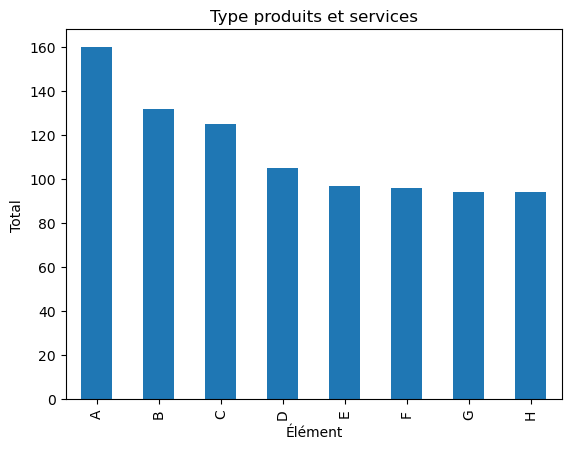

,Total,Proportion (%),Libellé
whatsapp,151,15.66,A
facebook,144,14.94,B
instagram,126,13.07,C
telegram,101,10.48,D
tiktok,98,10.17,E
snapchat,90,9.34,F
youtube,89,9.23,G
twitter,88,9.13,H
likee,77,7.99,I


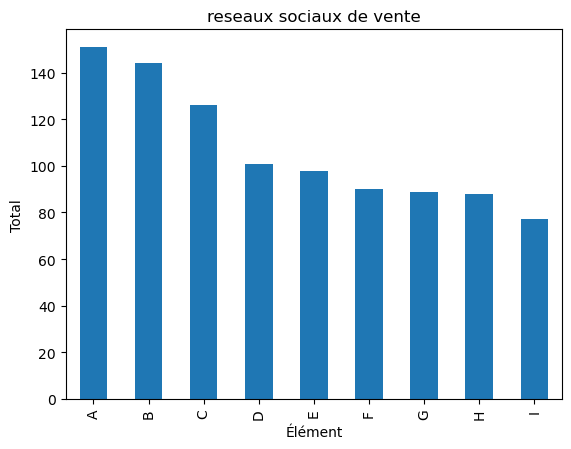

,Total,Proportion (%),Libellé
mpesa_vodacom,169,19.84,A
orange_money,125,14.67,B
airtel_money,115,13.50,C
carte_bancaire,107,12.56,D
virement_bancaire,102,11.97,E
cheque,100,11.74,F
afrimoney_africell,97,11.38,G
especes,37,4.34,H


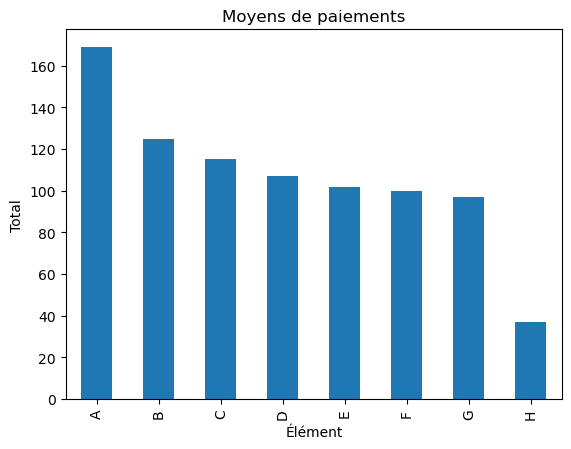

,Total,Proportion (%),Libellé
livraison_domicile_transporteur,132,51.97,A
livraison_point_relais,64,25.20,B
pas_de_livraison,58,22.83,C


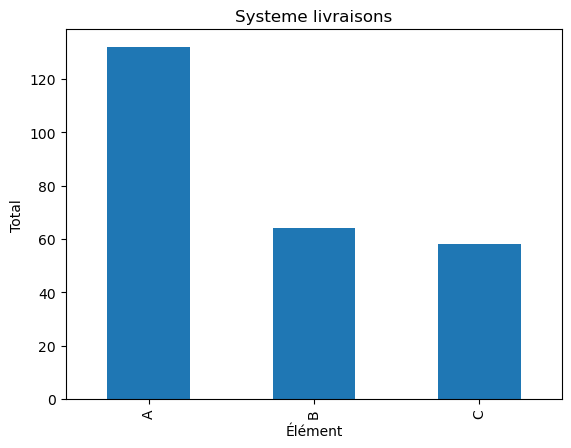

,Total,Proportion (%),Libellé
manque_confiance_consommateurs_commerce_electronique,158,22.80,A
difficultes_attirer_fideliser_clients,154,22.22,B
problemes_adressage_livraison,145,20.92,C
faible_penetration_internet,125,18.04,D
manque_infrastructures_paiement_electroniques_appropriees,111,16.02,E


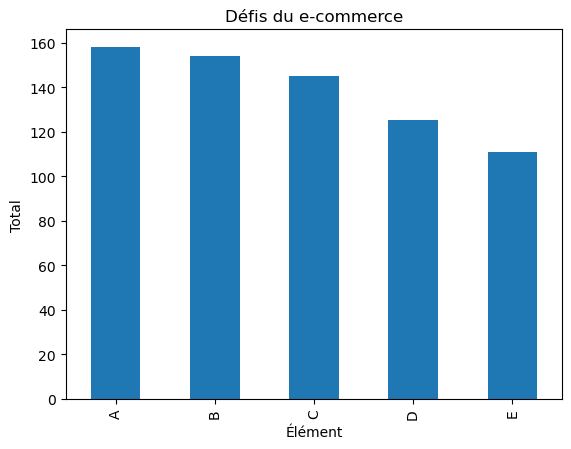

In [14]:
import pandas as pd
import ast

# Convertir les données en DataFrame pour une analyse facile
df_vendeurs = pd.DataFrame(vendeurs)

# Afficher les premières lignes du DataFrame pour vérifier les données
#display(df)

# Évaluer l'état actuel du commerce électronique

type_produits_services = df_vendeurs['type_produits_services']
reseaux_sociaux_vendres = df_vendeurs['reseaux_sociaux_vendre']
nombre_articles_achetes_vente = df_vendeurs['nombre_articles_achetes_vente']
nombre_articles_vendus = df_vendeurs['nombre_articles_vendus']
paiements = df_vendeurs['paiement']
systeme_livraisons = df_vendeurs['systeme_livraison']
defis_commerce_electroniques = df_vendeurs['defis_commerce_electronique'];


calculer_mesures(nombre_articles_achetes_vente)
calculer_mesures(nombre_articles_vendus)

recupere_element_plus_utilise(
    type_produits_services, 
    'type_produits_services',
    'Type produits et services'
)

recupere_element_plus_utilise(
    reseaux_sociaux_vendres, 
    'reseaux_sociaux_vendre',
    'reseaux sociaux de vente'
)
recupere_element_plus_utilise(
    paiements,
    'paiement',
    'Moyens de paiements'
)
recupere_element_plus_utilise(
    systeme_livraisons,
    'systeme_livraison',
    'Systeme livraisons'
)
recupere_element_plus_utilise(
    defis_commerce_electroniques,
    'defis_commerce_electronique',
    'Défis du e-commerce'
)


#### Achteurs

,Moyenne Arithmétique,Variance,Écart-Type
valeurs,175.979955,87370.394687,295.584835


,Total,Proportion (%)
vetements_accessoires,266,22.278057
autres,209,17.504188
appareils_electroniques_informatiques,153,12.814070
livre_medias,119,9.966499
produits_beaute_soins_personnels,110,9.212730
fournitures_scolaires,90,7.537688
instruments_musique,88,7.370184
alimentation_boissons,83,6.951424
automobile_accessoires,76,6.365159


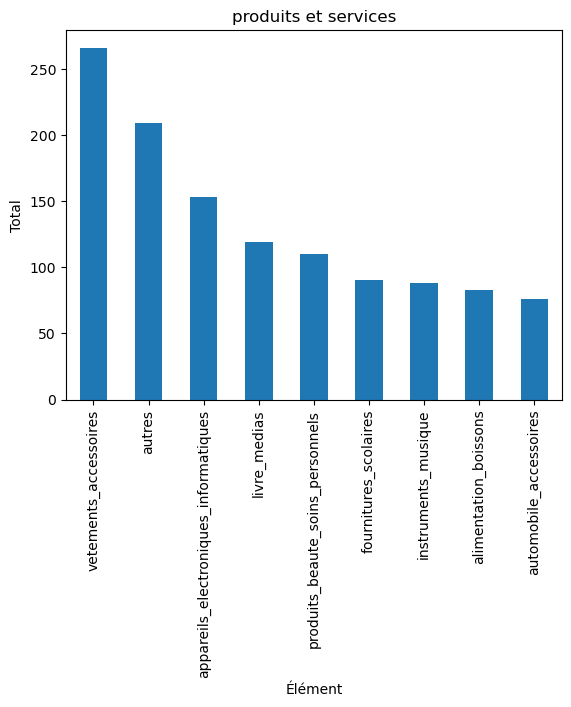

,Total,Proportion (%)
facebook,292,20.709220
whatsapp,291,20.638298
instagram,188,13.333333
telegram,143,10.141844
tiktok,137,9.716312
youtube,97,6.879433
snapchat,91,6.453901
likee,88,6.241135
twitter,83,5.886525


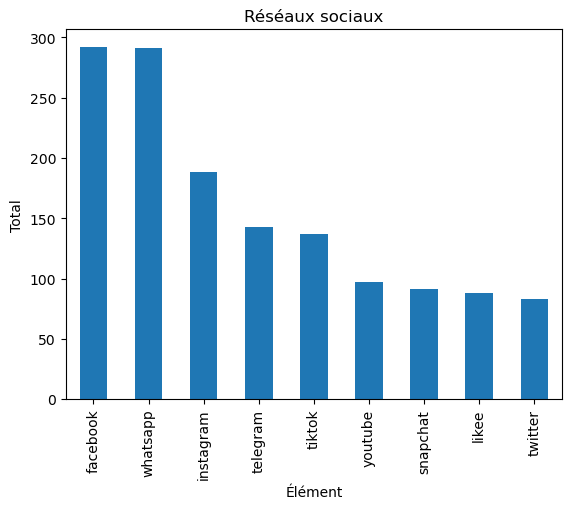

,Total,Proportion (%)
mpesa,239,22.675522
orange_money,162,15.370019
especes,129,12.239089
carte_bancaire,123,11.669829
airtel_money,122,11.574953
virement_bancaire,119,11.290323
cheque,81,7.685009
afrimoney,79,7.495256


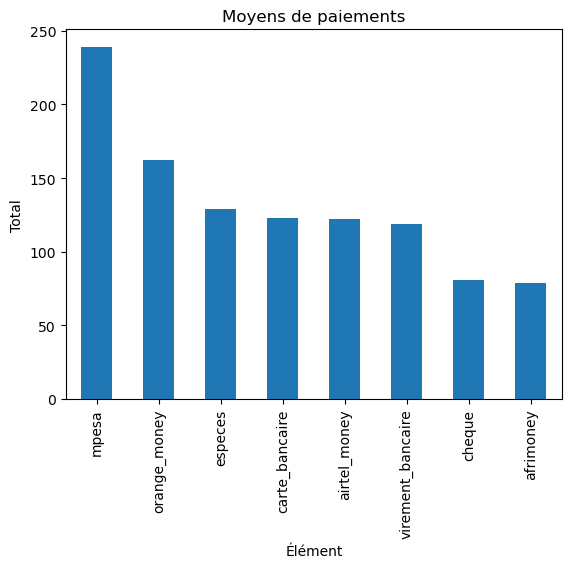

,Total,Proportion (%)
livraison_domicile,258,57.461024
autre,88,19.599109
recuperation_magasin,65,14.476615
depot_relai,38,8.463252


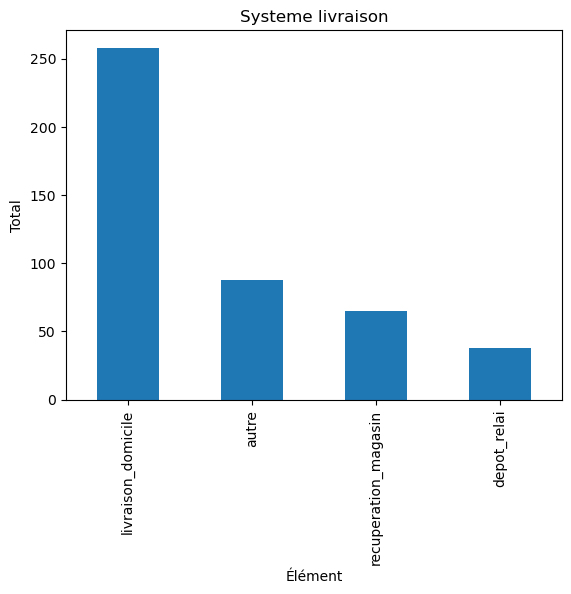

,Total,Proportion (%)
qualite_produit,291,34.933974
prix,232,27.851140
avis_clients,164,19.687875
autre,146,17.527011


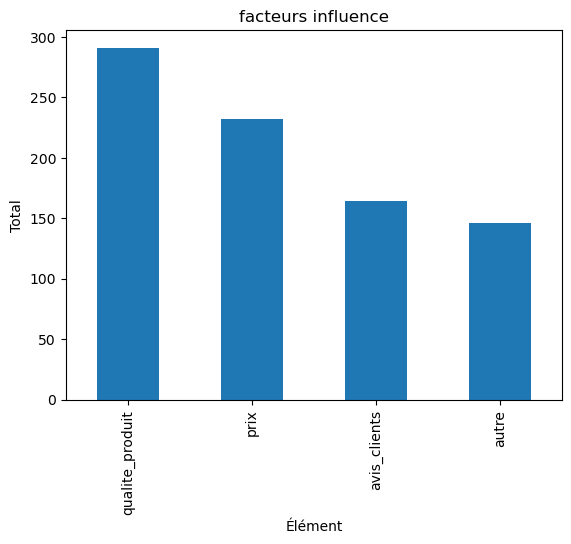

,Total,Proportion (%)
oui,251,55.902004
non,198,44.097996


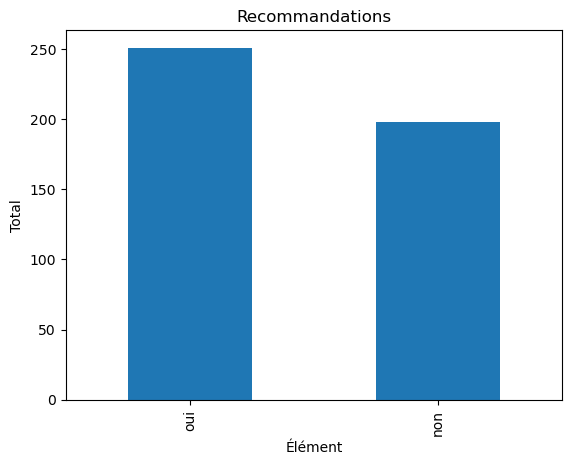

In [4]:
df_acheteurs = pd.DataFrame(acheteurs)

nombre_achats = df_acheteurs['nombre_achats']
produits_services = df_acheteurs['nombre_produits_services']
reseaux_sociaux = df_acheteurs['réseaux_sociaux']
paiements = df_acheteurs['paiement']
systeme_livraisons = df_acheteurs['systeme_livraison']
facteurs_influences = df_acheteurs['facteurs_influence']
recommandations = df_acheteurs['recommandation']

calculer_mesures(nombre_achats)

recupere_element_plus_utilise(
    produits_services,
    'produits_services',
    'produits et services'
)


recupere_element_plus_utilise(
    reseaux_sociaux,
    'reséaux_sociaux',
    'Réséaux sociaux'
)

recupere_element_plus_utilise(
    paiements,
    'paiement',
    'Moyens de paiements'
)

recupere_element_plus_utilise(
    systeme_livraisons,
    'systeme_livraison',
    'Systeme livraison'
)

recupere_element_plus_utilise(
    facteurs_influences,
    'facteurs_influence',
    'facteurs influence'
)

recupere_element_plus_utilise(
    recommandations,
    'recommandation',
    'Recommandations'
)

### Identifier les plateformes de commerce électronique les plus populaires en RDC et évaluer leur efficacité en termes de visibilité et de facilité d’utilisation pour les vendeurs et les acheteurs

In [17]:
def moyenne_reseaux_sociaux_vendre_page (df, key='nombre_abonnes_pages') :
    nombre_abonnes_pages = df[key]
    nombre_abonnes_pages = nombre_abonnes_pages.explode(key)
    reseaux = []
    abonnes = []
    for data in nombre_abonnes_pages:
        for key, value in data.items():
            reseaux.append(key)
            abonnes.append(value)
    nombre_abonnes_pages = pd.DataFrame({
        'reseaux': reseaux,
        'abonnes': abonnes
    })
    display(nombre_abonnes_pages)
    nombre_abonnes_pages['abonnes'] = nombre_abonnes_pages['abonnes'].apply(pd.to_numeric, errors='coerce') 
    nombre_abonnes_pages = nombre_abonnes_pages.groupby('reseaux')['abonnes'].mean()
    
    display(nombre_abonnes_pages.sort_values(ascending=False))
    
    
moyenne_reseaux_sociaux_vendre_page(df_vendeurs) 
moyenne_reseaux_sociaux_vendre_page(df_vendeurs, 'nombre_vues_moyen_publication')


,reseaux,abonnes
0,youtube,3209
1,twitter,4976
2,tiktok,998
3,whatsapp,300
4,facebook,222
...,...,...
959,tiktok,3563
960,instagram,496
961,facebook,3771
962,telegram,705


reseaux
youtube      3067.359551
telegram     2851.594059
snapchat     2765.933333
likee        2501.376623
facebook     2460.576389
twitter      2337.102273
tiktok       2199.051020
instagram    1977.285714
whatsapp     1827.231293
Name: abonnes, dtype: float64

,reseaux,abonnes
0,youtube,1219
1,twitter,3861
2,tiktok,474
3,whatsapp,300
4,facebook,5
...,...,...
938,tiktok,965
939,instagram,373
940,facebook,3071
941,telegram,256


reseaux
instagram    1679.753968
youtube      1464.044944
snapchat     1404.677778
telegram     1382.702970
likee        1348.350649
twitter      1167.329545
tiktok       1141.043956
facebook     1039.436090
whatsapp      906.361111
Name: abonnes, dtype: float64